The quadratic expression:

$(x-4)(x+2) = x^2 - 2x -8$

has roots at 4 and -2 (by design). Let's see that...

For what values of $x$ does the following hold?

$(x-4)(x+2) = 0$

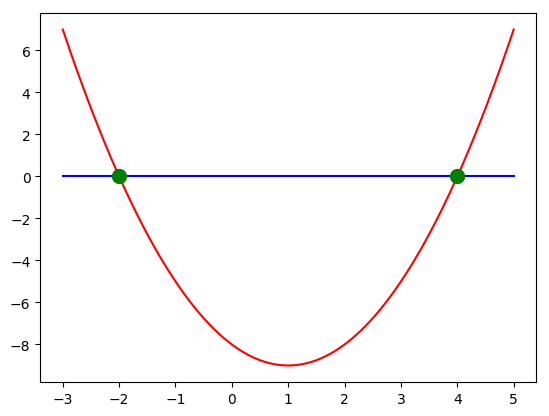

Roots of the equation: (-2.0, 4.0)


In [10]:
using PyPlot

a, b, c = 1, -2, -8
f1(x) = a*x^2 + b*x + c

#This returns the tuple of solutions of the quadratic equation ax^2+bx+c = 0
sols(a,b,c) =   (-b - sqrt(b^2 - 4*a*c))/2a, (-b + sqrt(b^2 - 4*a*c))/2a
solutions = sols(a,b,c)
xDomain = -3:0.01:5
plot(xDomain,f1.(xDomain),"r")
plot([-3, 5],[0,0],"b");
plot([solutions[1],solutions[2]],[0,0],"g.",ms="20")
println("Roots of the equation: ", solutions)

In [11]:
? sign

search: sign signed Signed signbit significand Unsigned unsigned flipsign



```
sign(x)
```

Return zero if `x==0` and $x/|x|$ otherwise (i.e., ±1 for real `x`).


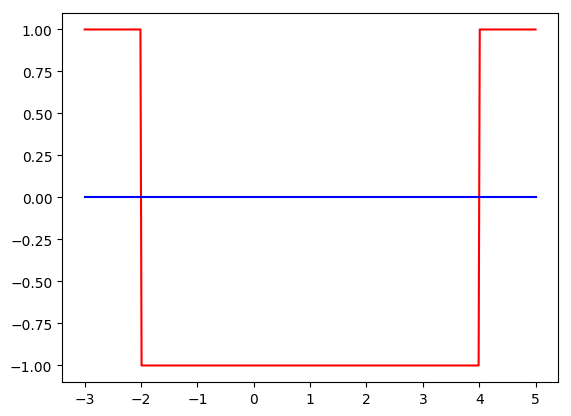

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0a3ccef590>

In [15]:
sgn = sign.(f1.(xDomain))
plot(xDomain,sgn,"r")
plot([-3, 5],[0,0],"b")

In [17]:
length(sgn)

801

### An example of a "compile time" error

In [22]:
sgn sqrt(244)

LoadError: syntax: extra token "sqrt" after end of expression

### An example of a "run time" error

In [19]:
sgn[802]

BoundsError: BoundsError: attempt to access 801-element Array{Float64,1} at index [802]

In [21]:
for i in 1:length(sgn)-1
   if sgn[i] != sgn[i+1]    #sign change
        println("Sign change at ", i)
   end
end

Sign change at 100
Sign change at 101
Sign change at 700
Sign change at 701


In [23]:
xDomain[100]

-2.01

In [24]:
xDomain[101]

-2.0

In [25]:
xDomain[700]

3.99

In [26]:
xDomain[701]

4.0

In [33]:
sgn[99]

1.0

In [34]:
sgn[100]

1.0

In [35]:
sgn[101]

0.0

In [36]:
sgn[102]

-1.0

In [38]:
for i in 1:length(sgn)-1
   if sgn[i] != sgn[i+1] && sgn[i] != 0
        println("Sign change at ", i)
   end
end

Sign change at 100
Sign change at 700


In [39]:
roots = []
for i in 1:length(sgn)-1
   if sgn[i] != sgn[i+1] && sgn[i] != 0
        push!(roots, xDomain[i])
    end
end
roots

2-element Array{Any,1}:
 -2.01
  3.99

In [40]:
roots = []
for i in 1:length(sgn)-1
   if sgn[i] != sgn[i+1] && sgn[i] != 0
        push!(roots, (xDomain[i] + xDomain[i+1])/2 )
    end
end
roots

2-element Array{Any,1}:
 -2.005
  3.995

In [41]:
# This function looks for roots of the mathematical function f() over grid
function findRoots(f,grid)
    sgn = sign.(f.(grid))
    roots = []
    for i in 1:length(sgn)-1
       if sgn[i] != sgn[i+1] && sgn[i] != 0
        push!(roots, (grid[i] + grid[i+1])/2 )
       end
    end
    return roots   
end

findRoots(f1,-10:0.001:10)

2-element Array{Any,1}:
 -2.0004999999999997
  3.9995000000000003

In [42]:
findRoots(f1,-10:0.00001:10)

2-element Array{Any,1}:
 -2.000005
  3.999995

In [43]:
linearF(x) = 2x + 3
findRoots(linearF,-10:0.00001:10)

1-element Array{Any,1}:
 -1.500005

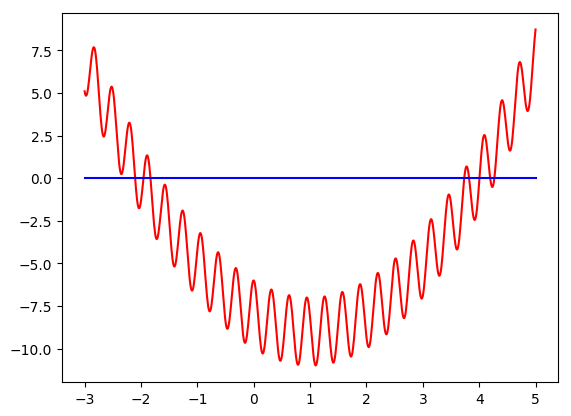

8-element Array{Any,1}:
 -2.1045            
 -1.9575            
 -1.8325            
  3.7344999999999997
  3.8215000000000003
  4.0045            
  4.1955            
  4.2695            

In [45]:
f2(x) = f1(x) + 2*cos(20x)
plot(xDomain,f2.(xDomain),"r")
plot([-3,5],[0,0],"b");
rts = findRoots(f2,-10:0.001:10)

In [47]:

? filter

search: filter filter! fieldtype fill_between fill_betweenx



```
filter(f, a::AbstractArray)
```

Return a copy of `a`, removing elements for which `f` is `false`. The function `f` is passed one argument.

# Examples

```jldoctest
julia> a = 1:10
1:10

julia> filter(isodd, a)
5-element Array{Int64,1}:
 1
 3
 5
 7
 9
```

---

```
filter(f, d::AbstractDict)
```

Return a copy of `d`, removing elements for which `f` is `false`. The function `f` is passed `key=>value` pairs.

# Examples

```jldoctest
julia> d = Dict(1=>"a", 2=>"b")
Dict{Int64,String} with 2 entries:
  2 => "b"
  1 => "a"

julia> filter(p->isodd(p.first), d)
Dict{Int64,String} with 1 entry:
  1 => "a"
```


In [50]:
findRoots(x->(abs(x)-1),-3:0.001:3)

2-element Array{Any,1}:
 -1.0005
  0.9995

In [49]:
#isPositive(x) = x>0
#filter(isPositive,rts)

filter(x->(x>0),rts)

5-element Array{Any,1}:
 3.7344999999999997
 3.8215000000000003
 4.0045            
 4.1955            
 4.2695            

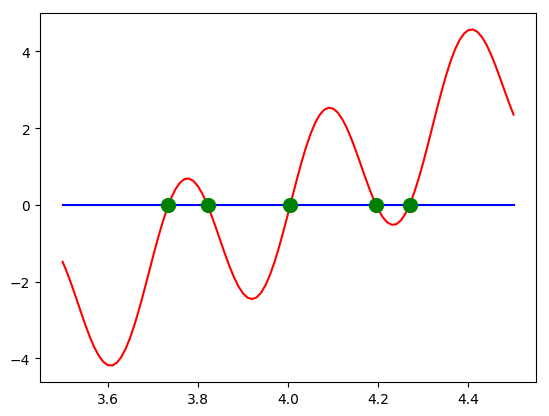

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0a3cafc410>

In [52]:
fineDomain = 3.5:0.01:4.5
plot(fineDomain,f2.(fineDomain),"r")
plot([3.5,4.5],[0,0],"b")
posRoots = filter(x->(x>0),rts)
plot(posRoots,zeros(length(posRoots)), "g.", ms = "20")